# Clustering
- Grouping similar data together

# KMeans Clustering
<img align = 'left' src = 'KMC.jpg' style = 'width:600px; hieght:400px' />

## KMeans Clustering
- Step1 : Select a value of K (Number of clusters)
- Step2 : Asign a cluster to each data point randomly
- Step3 : Calculate centroids for each cluster
- Step4 : Assign each data point to its closest centroid
- Step5 : Back to step3

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib import style
style.use('ggplot')

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [4]:
df = pd.read_csv('Mall_customers.csv')
df.head(10)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [6]:
df.duplicated().sum()

0

In [7]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

<AxesSubplot:ylabel='Annual Income (k$)'>

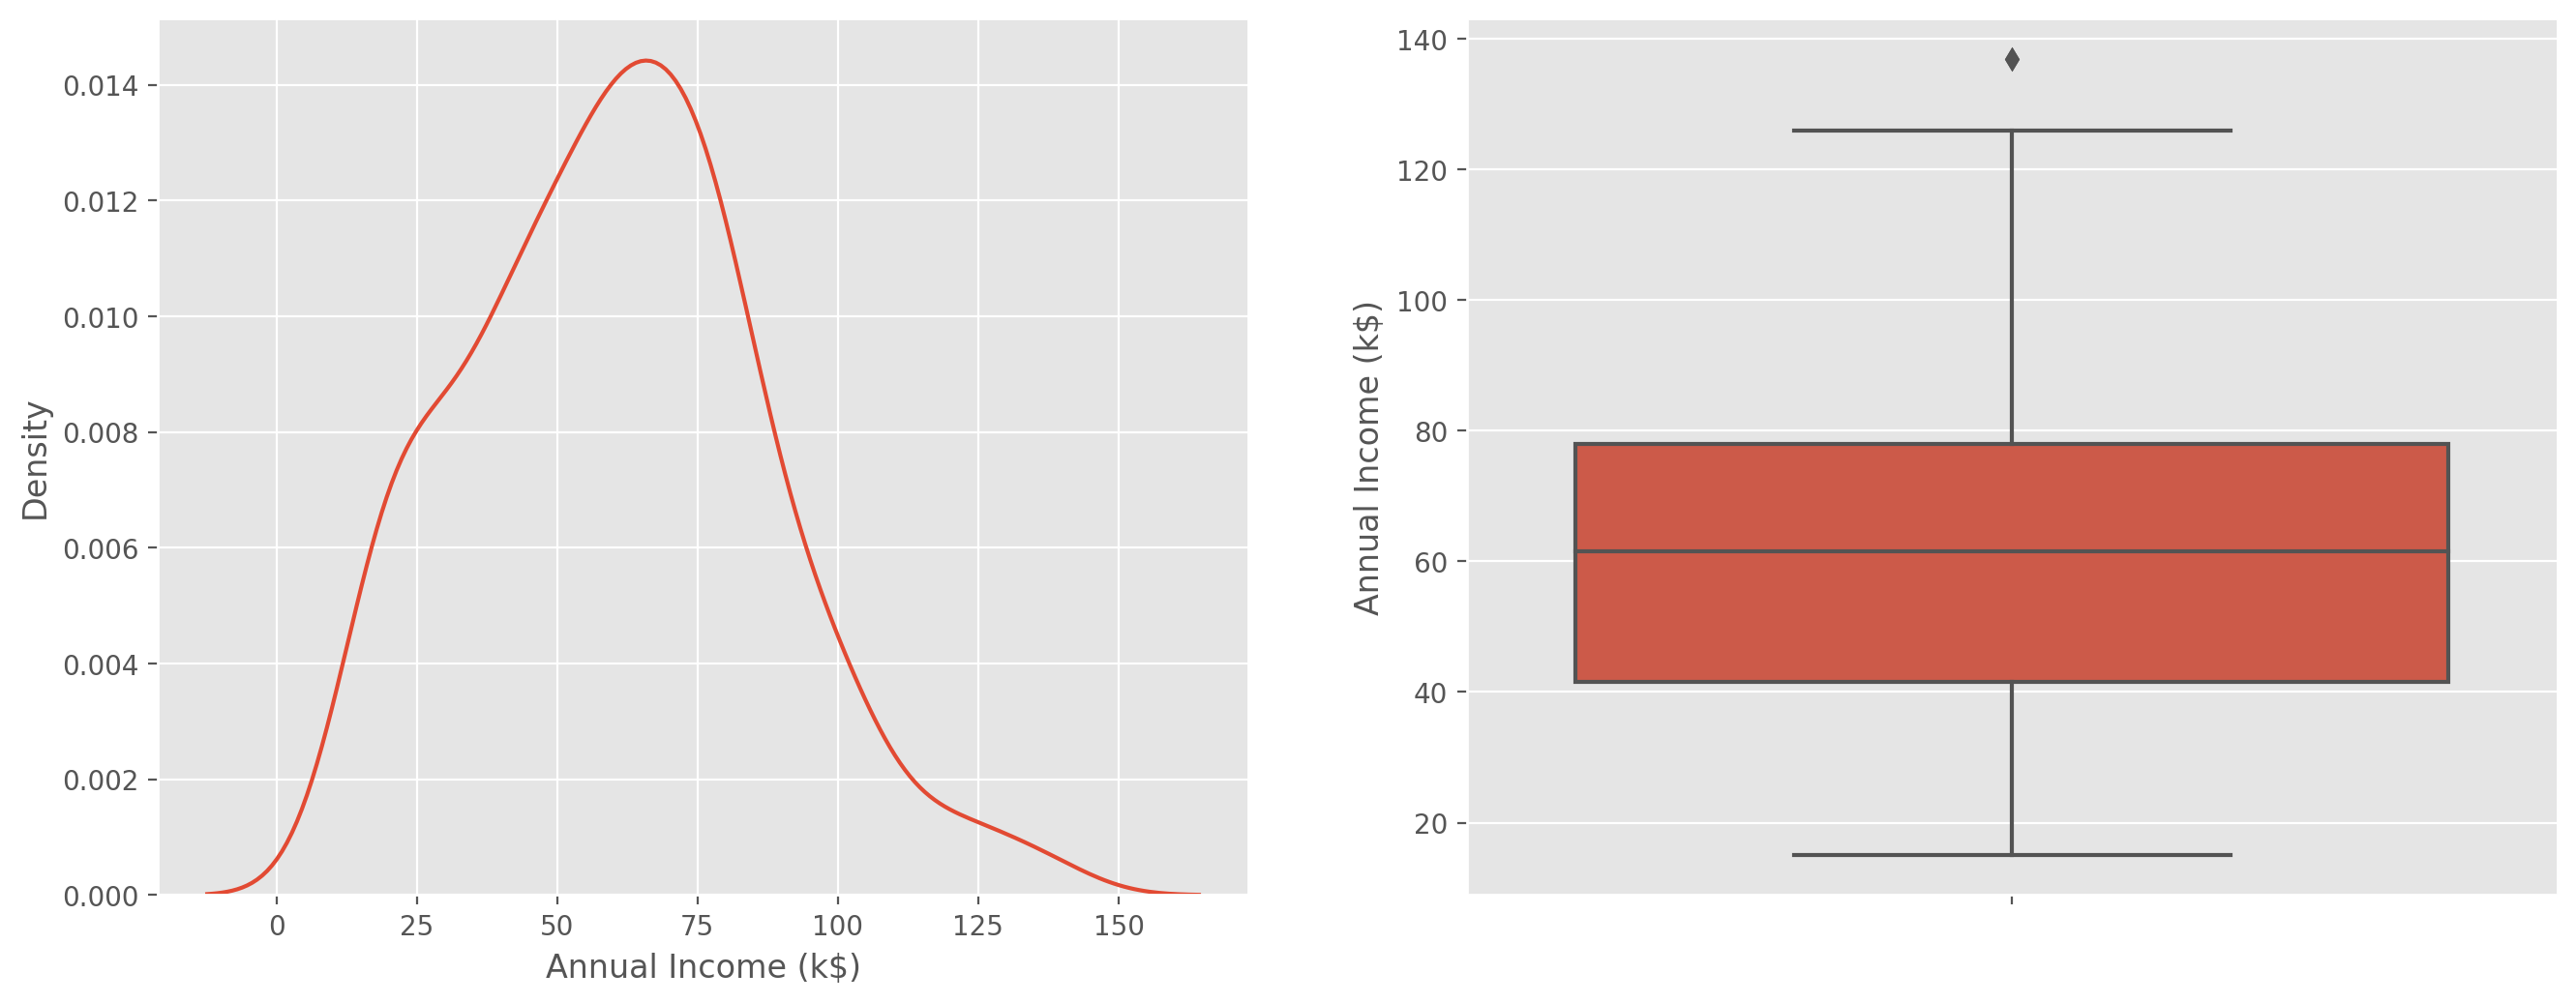

In [10]:
plt.figure(figsize = (16,6), dpi = 200)
plt.subplot(1,2,1)
sns.distplot(df['Annual Income (k$)'], hist = False)
plt.subplot(1,2,2)
sns.boxplot(y = df['Annual Income (k$)'])

<AxesSubplot:ylabel='Spending Score (1-100)'>

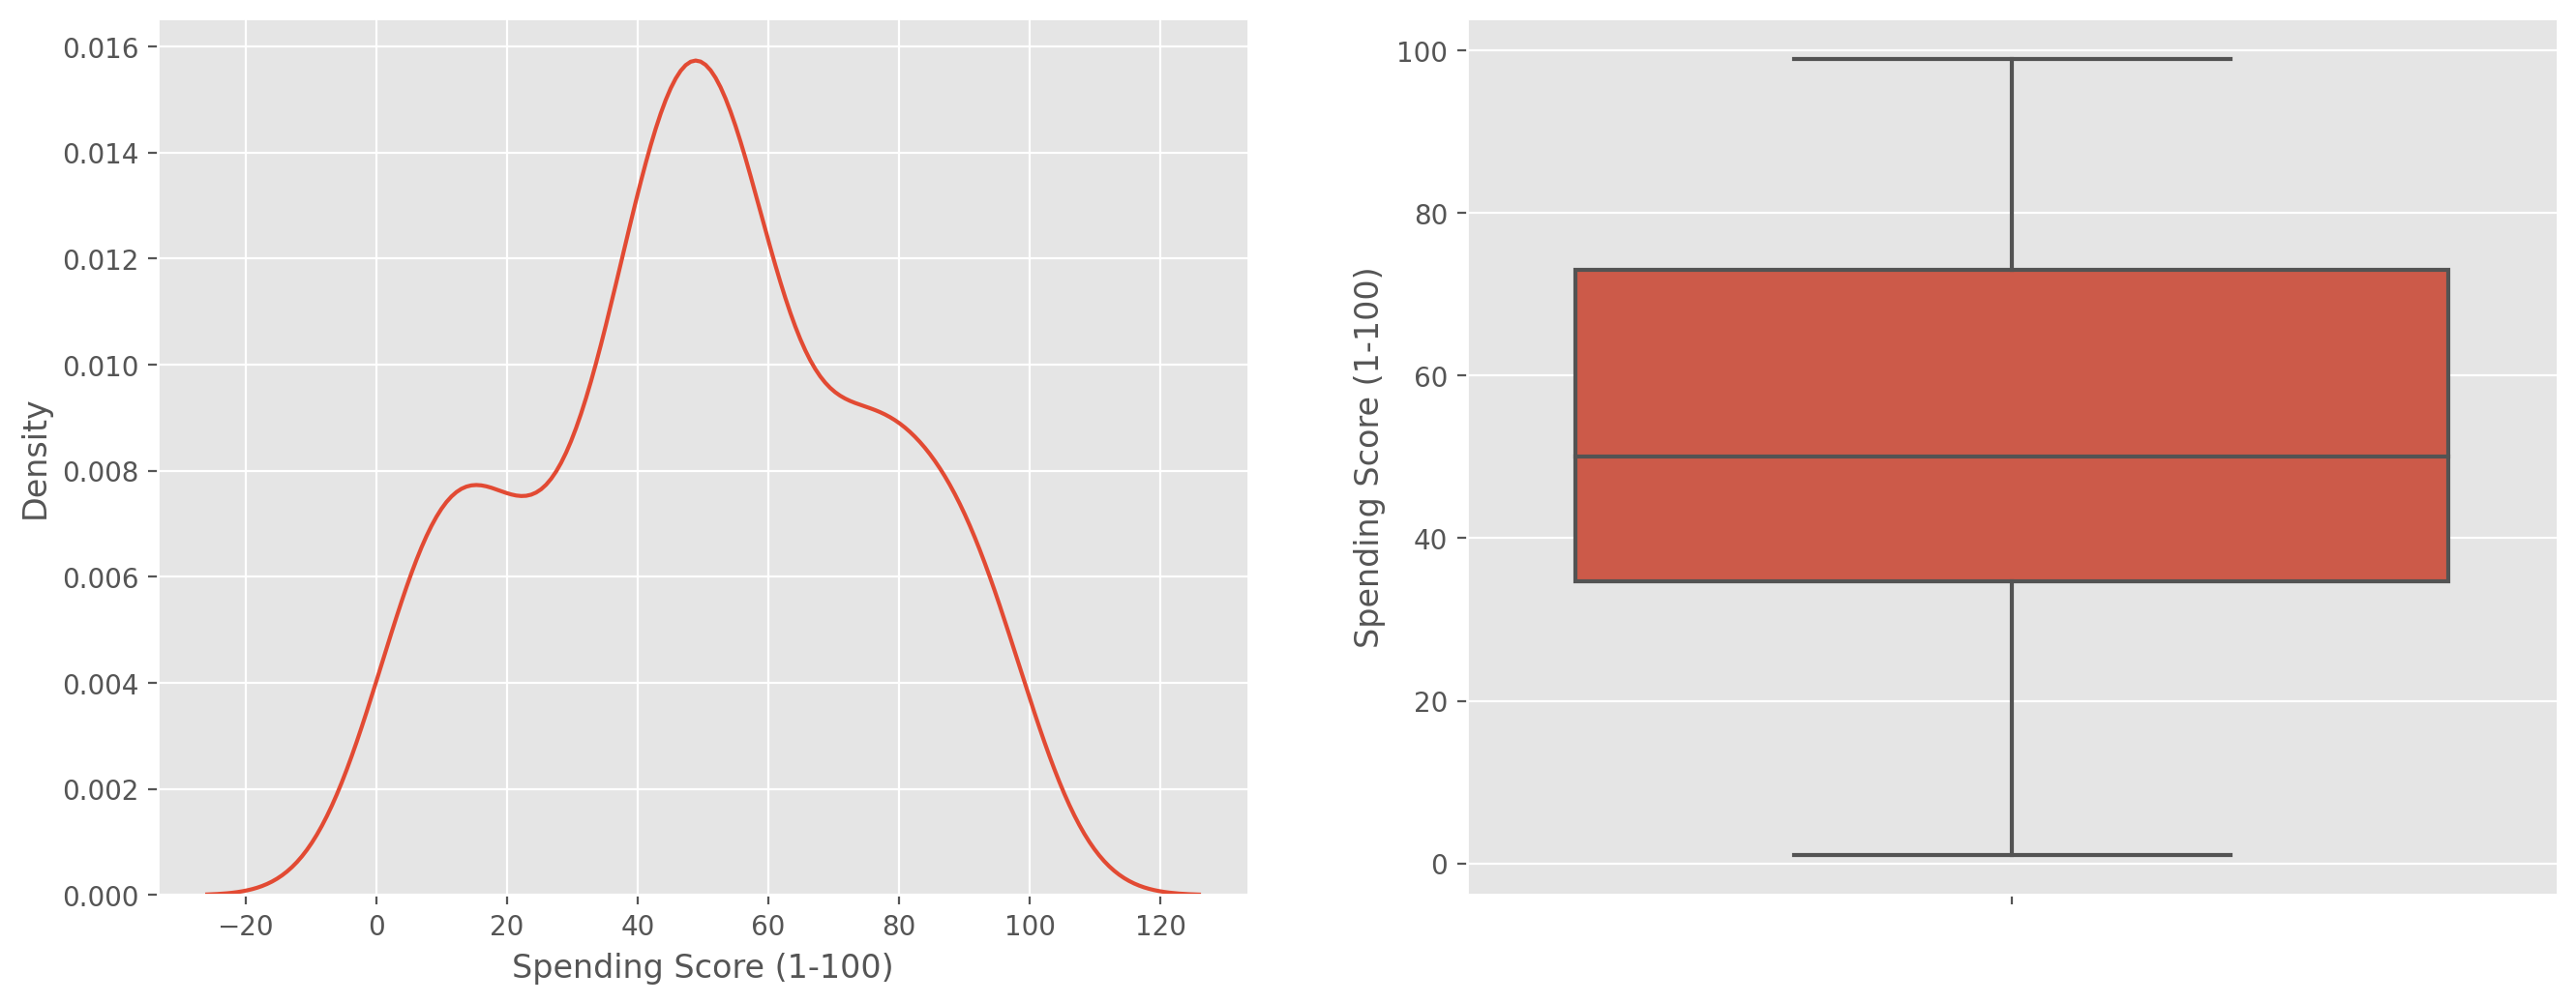

In [11]:
plt.figure(figsize = (16,6), dpi = 200)
plt.subplot(1,2,1)
sns.distplot(df['Spending Score (1-100)'], hist = False)
plt.subplot(1,2,2)
sns.boxplot(y = df['Spending Score (1-100)'])

<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

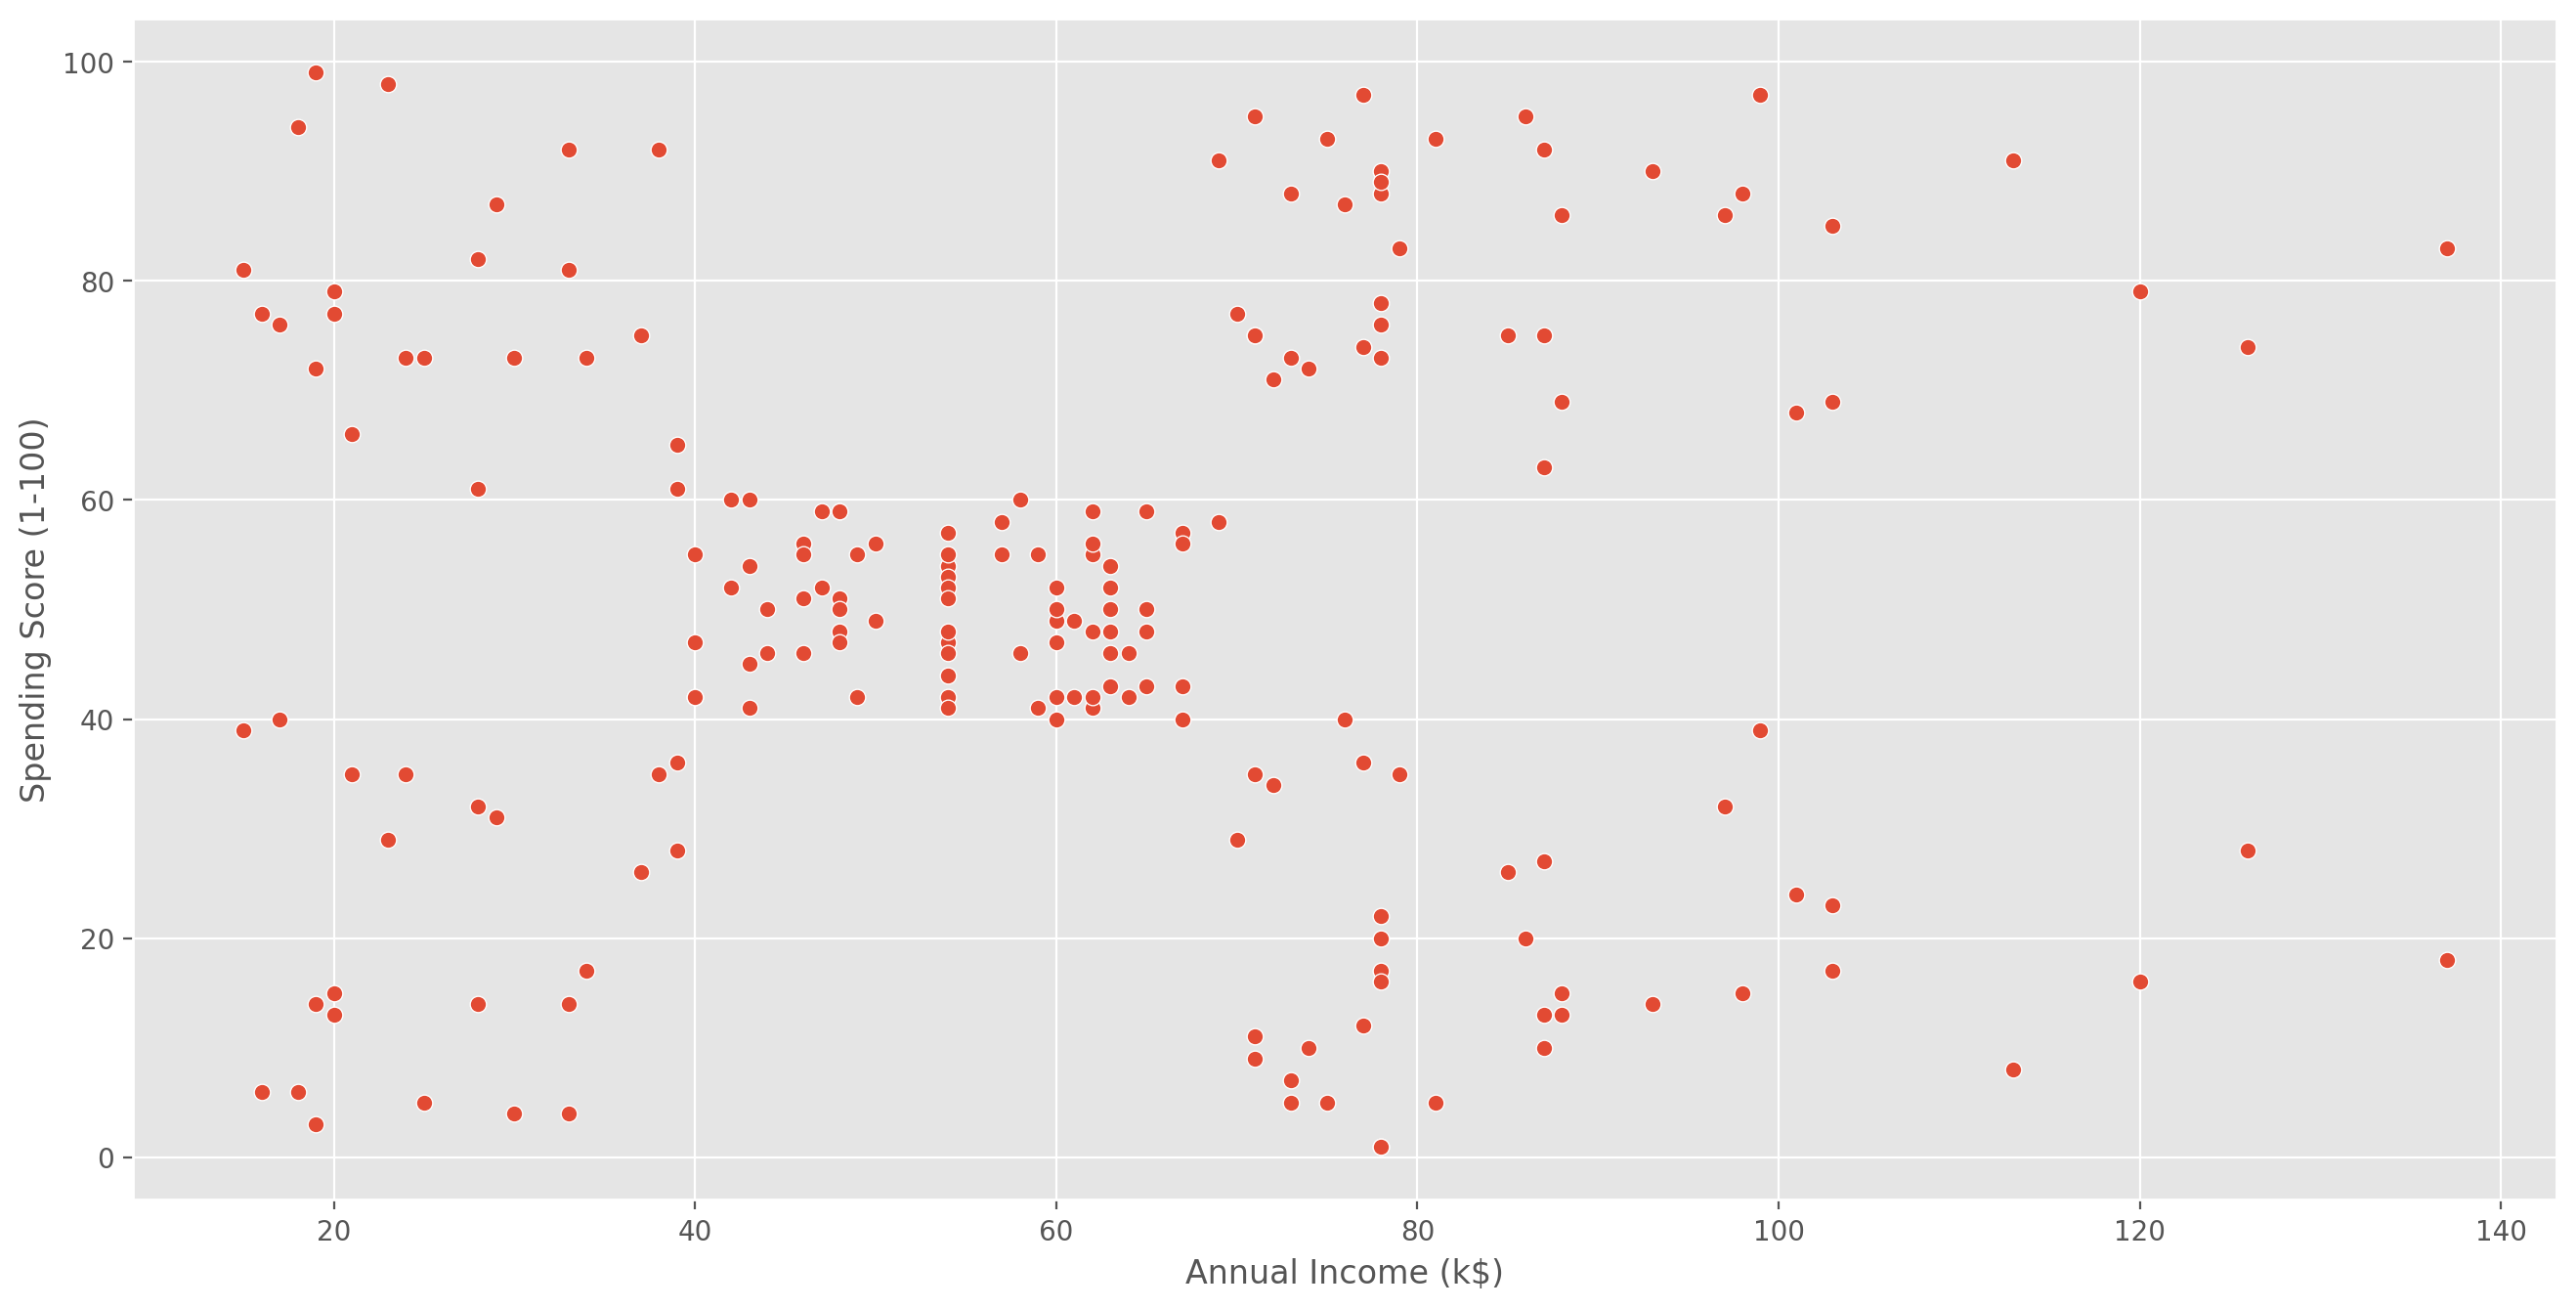

In [12]:
plt.figure(figsize = (16,8), dpi = 200)
sns.scatterplot(df['Annual Income (k$)'], df['Spending Score (1-100)'])

---
---

In [14]:
X = df[['Annual Income (k$)', 'Spending Score (1-100)']].values
X[:5]

array([[15, 39],
       [15, 81],
       [16,  6],
       [16, 77],
       [17, 40]], dtype=int64)

In [28]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters = 3)
km.fit(X)

KMeans(n_clusters=3)

In [29]:
y_kmeans = km.predict(X)
y_kmeans

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2])

In [30]:
km.cluster_centers_

array([[87.        , 18.63157895],
       [44.15447154, 49.82926829],
       [86.53846154, 82.12820513]])

In [33]:
X[120:130]

array([[67, 56],
       [67, 40],
       [69, 58],
       [69, 91],
       [70, 29],
       [70, 77],
       [71, 35],
       [71, 95],
       [71, 11],
       [71, 75]], dtype=int64)

In [34]:
y_kmeans[120:130]

array([1, 1, 1, 2, 0, 2, 0, 2, 0, 2])

In [35]:
km.inertia_        # WCSS (Within cluster sum of squares)

106348.37306211119

### Visualizing the clusters

In [45]:
# Extracting all data points belonging to cluster 0
X[y_kmeans == 0]

array([[ 70,  29],
       [ 71,  35],
       [ 71,  11],
       [ 71,   9],
       [ 72,  34],
       [ 73,   5],
       [ 73,   7],
       [ 74,  10],
       [ 75,   5],
       [ 76,  40],
       [ 77,  12],
       [ 77,  36],
       [ 78,  22],
       [ 78,  17],
       [ 78,  20],
       [ 78,  16],
       [ 78,   1],
       [ 78,   1],
       [ 79,  35],
       [ 81,   5],
       [ 85,  26],
       [ 86,  20],
       [ 87,  27],
       [ 87,  13],
       [ 87,  10],
       [ 88,  13],
       [ 88,  15],
       [ 93,  14],
       [ 97,  32],
       [ 98,  15],
       [ 99,  39],
       [101,  24],
       [103,  17],
       [103,  23],
       [113,   8],
       [120,  16],
       [126,  28],
       [137,  18]], dtype=int64)

In [49]:
# Extracting annual income for data points belonging to cluster 0
X[y_kmeans == 0,0]

array([ 70,  71,  71,  71,  72,  73,  73,  74,  75,  76,  77,  77,  78,
        78,  78,  78,  78,  78,  79,  81,  85,  86,  87,  87,  87,  88,
        88,  93,  97,  98,  99, 101, 103, 103, 113, 120, 126, 137],
      dtype=int64)

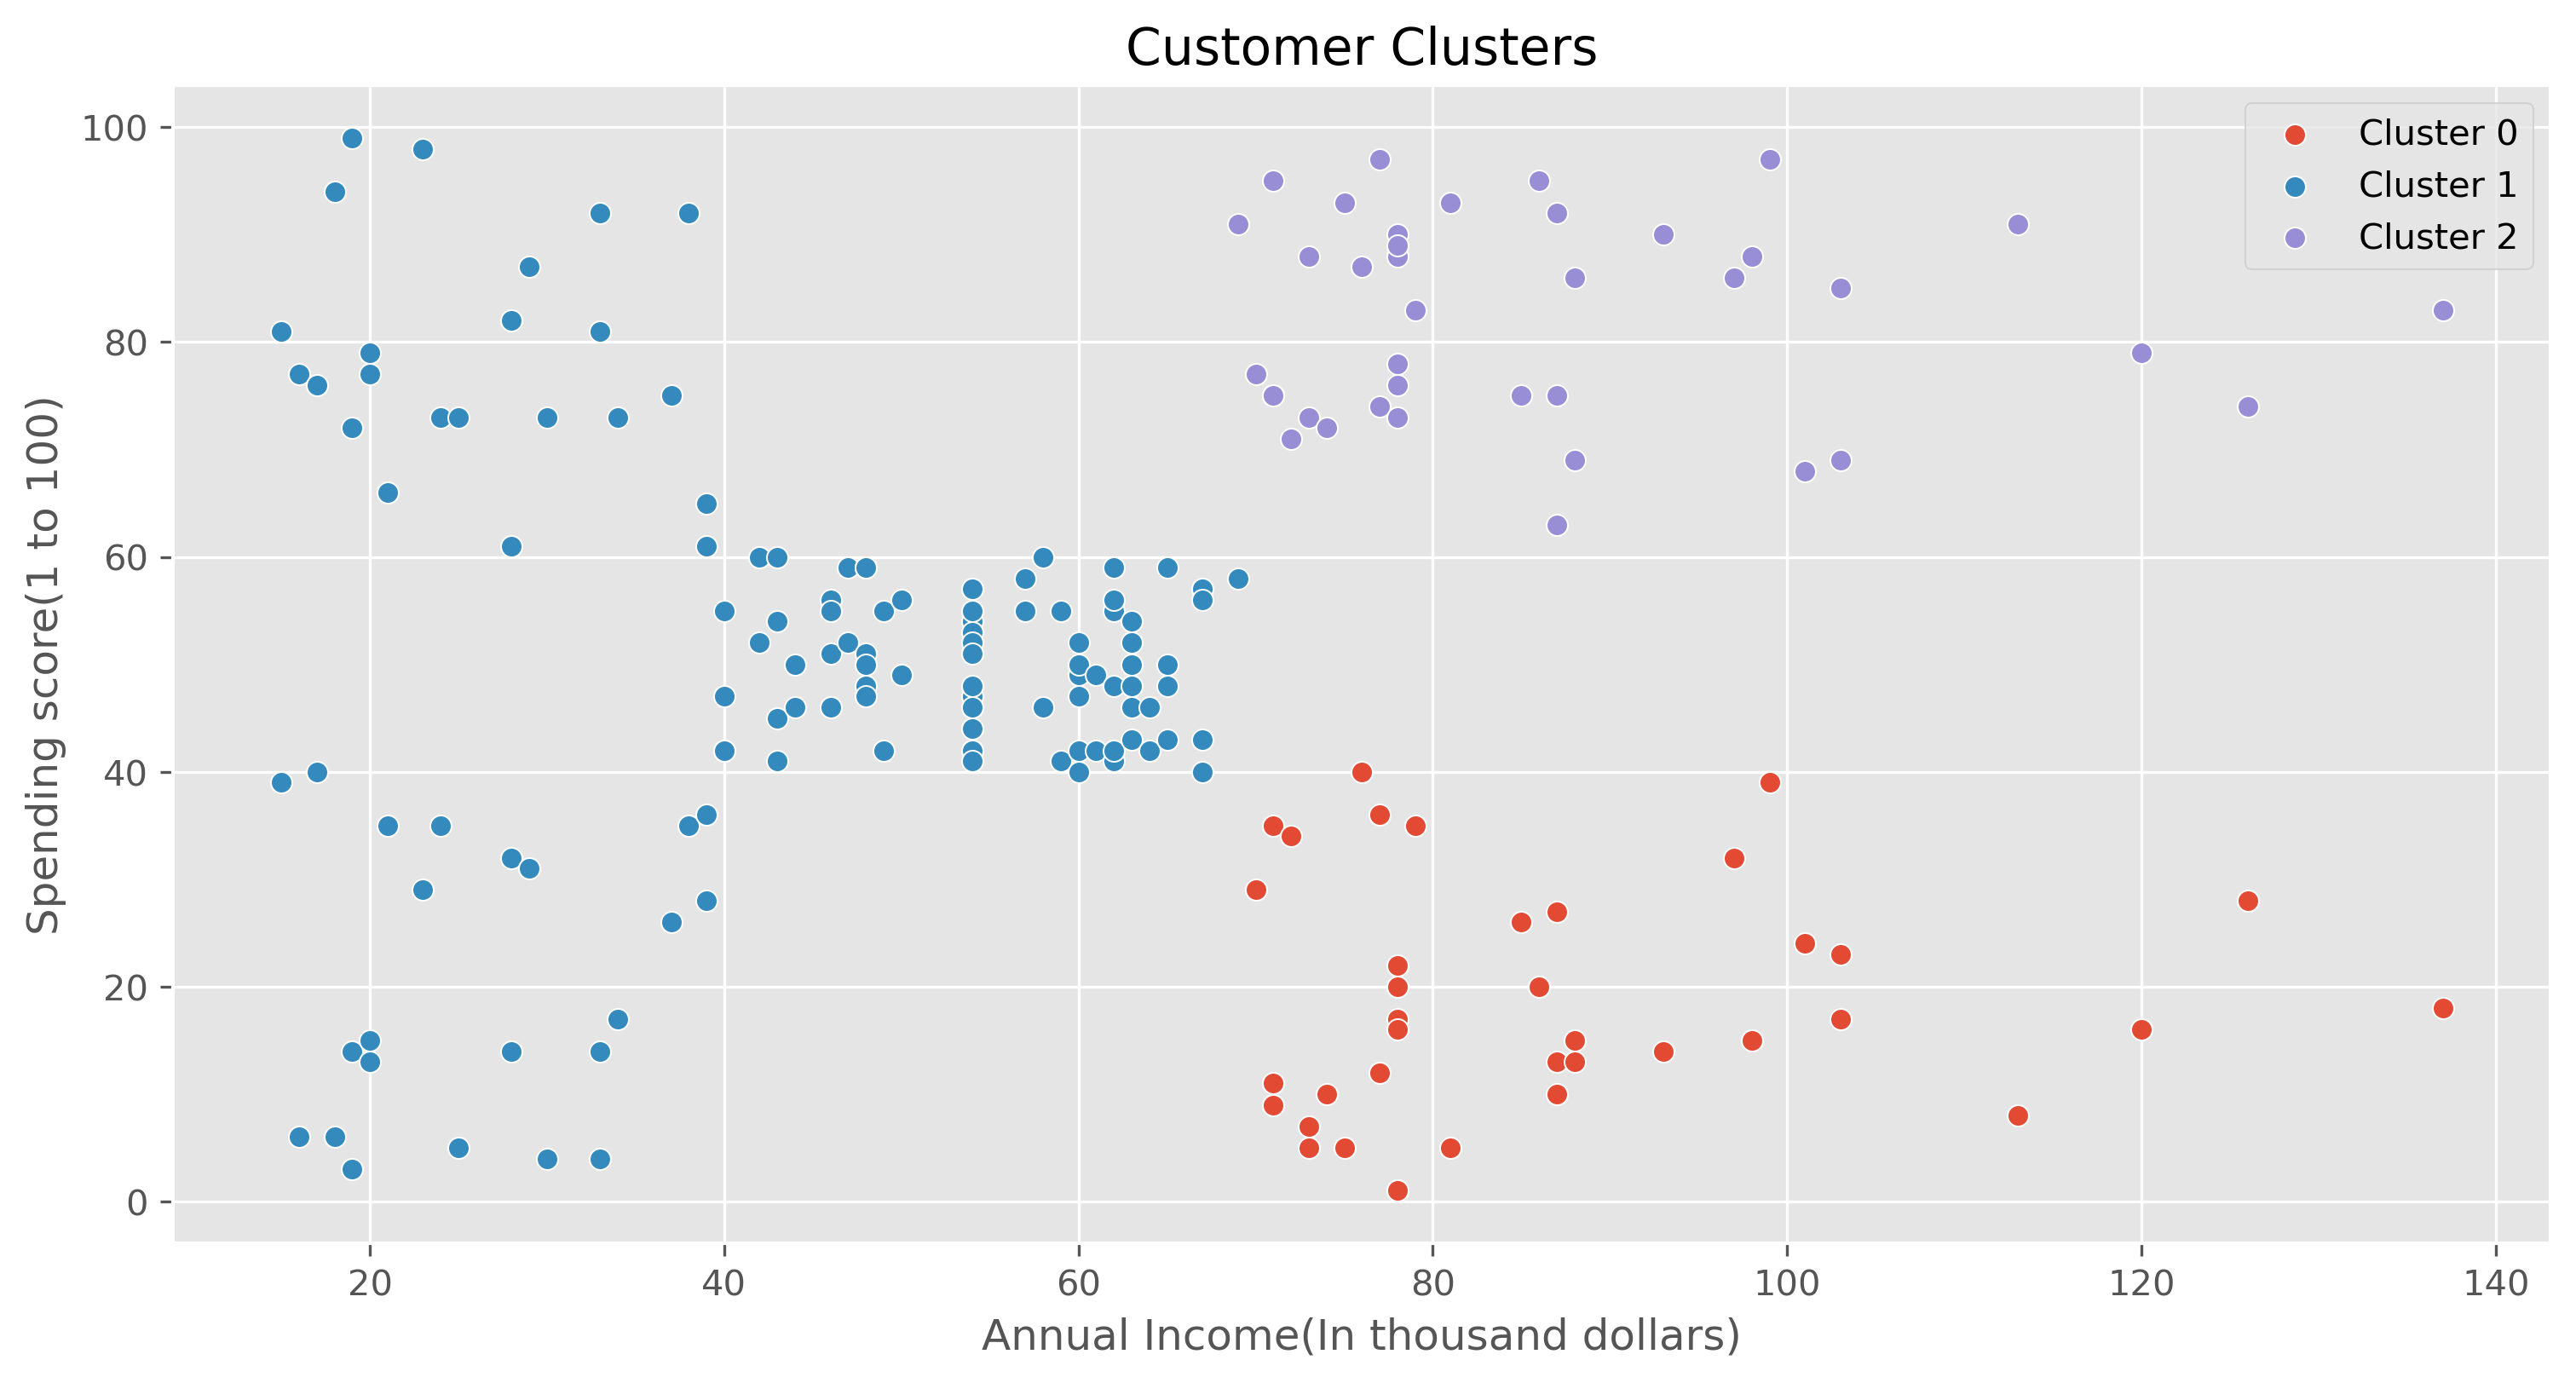

In [50]:
# Visualizing clusters
plt.figure(figsize = (12,6), dpi = 300)
sns.scatterplot(X[y_kmeans == 0,0], X[y_kmeans == 0,1], label = 'Cluster 0')
sns.scatterplot(X[y_kmeans == 1,0], X[y_kmeans == 1,1], label = 'Cluster 1')
sns.scatterplot(X[y_kmeans == 2,0], X[y_kmeans == 2,1], label = 'Cluster 2')

plt.title('Customer Clusters')
plt.xlabel('Annual Income(In thousand dollars)')
plt.ylabel('Spending score(1 to 100)')
plt.legend()
plt.show()

# ======================================================
# Elbow Method (Find the best value of K)

In [51]:
wcss = []
for k in range(1,21):
    km = KMeans(n_clusters = k)
    km.fit(X)
    wcss.append(km.inertia_)

Text(0, 0.5, 'WCSS')

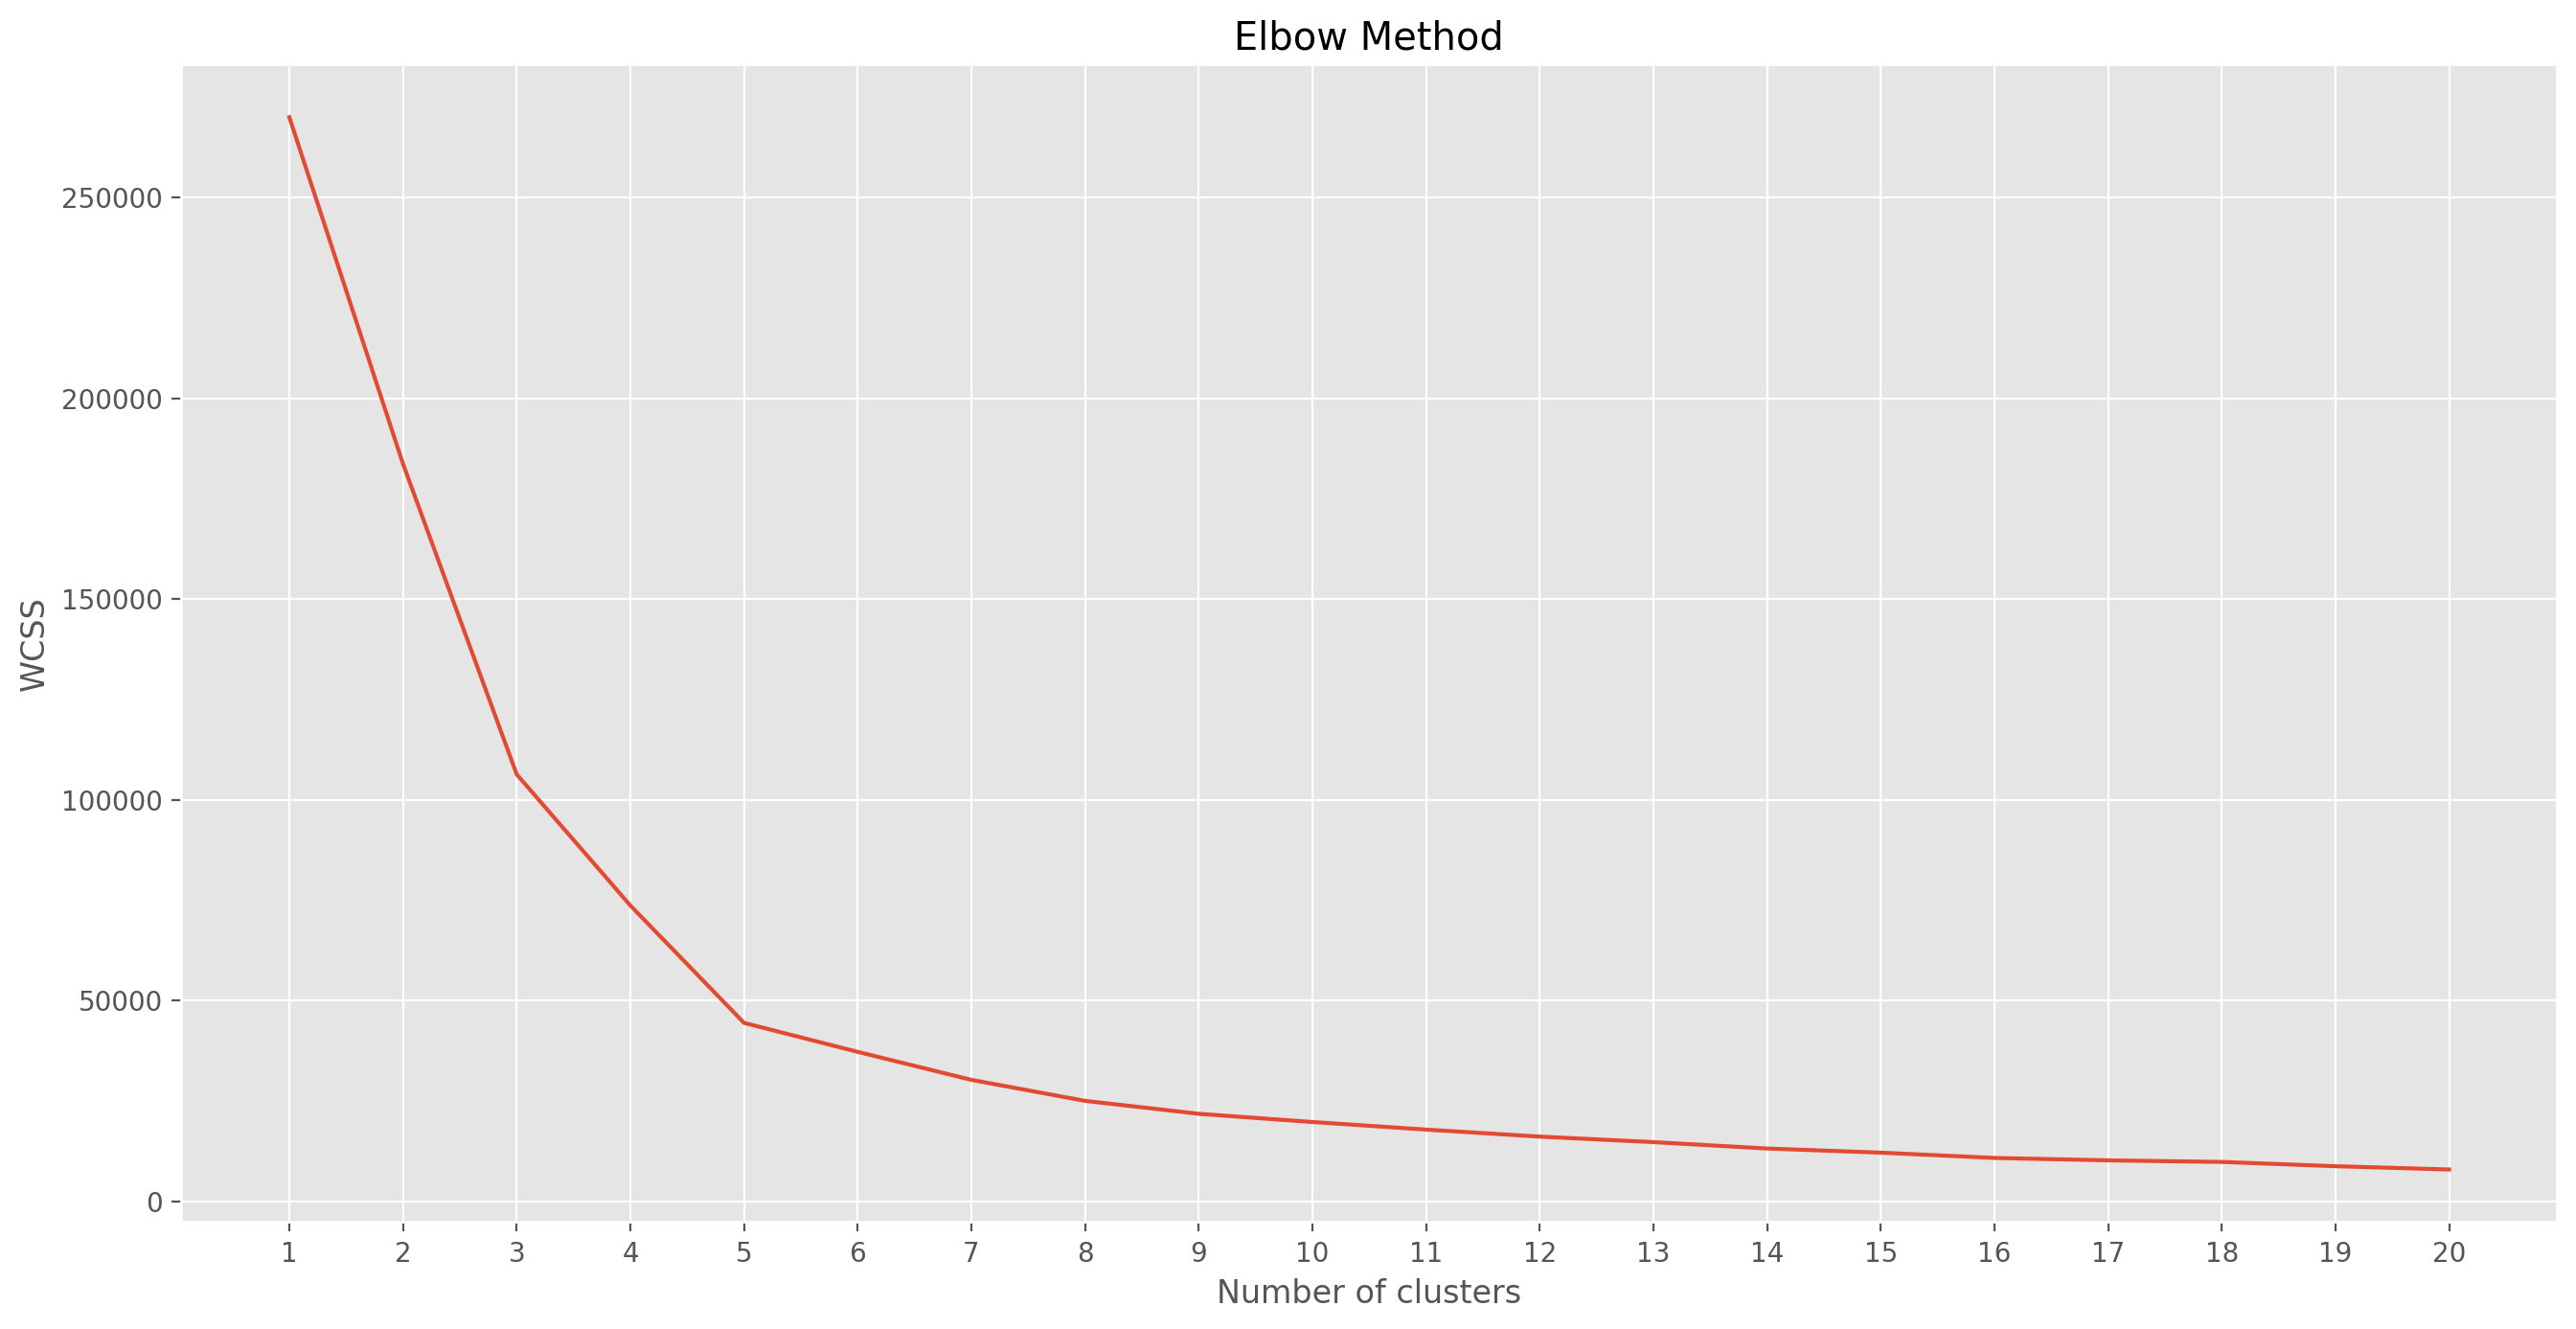

In [53]:
k = range(1,21)
plt.figure(figsize = (16,8), dpi = 200)
sns.lineplot(k, wcss)

plt.xticks(k)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

- The value of k where the elbow exists is the best value of k
- The elbow represents a change in the rate of reduction in WCSS
    - Upto that value of k the reduction was fast
    - After that value of k the reduction becomes slow

In [64]:
# Best model
km_best = KMeans(n_clusters = 5)
km_best.fit(X)

KMeans(n_clusters=5)

In [65]:
y_kmeans = km_best.predict(X)
y_kmeans

array([2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 0,
       2, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 1, 4, 0, 4, 1, 4, 1, 4,
       0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4])

In [68]:
centroids = km_best.cluster_centers_
centroids

array([[55.2962963 , 49.51851852],
       [88.2       , 17.11428571],
       [26.30434783, 20.91304348],
       [25.72727273, 79.36363636],
       [86.53846154, 82.12820513]])

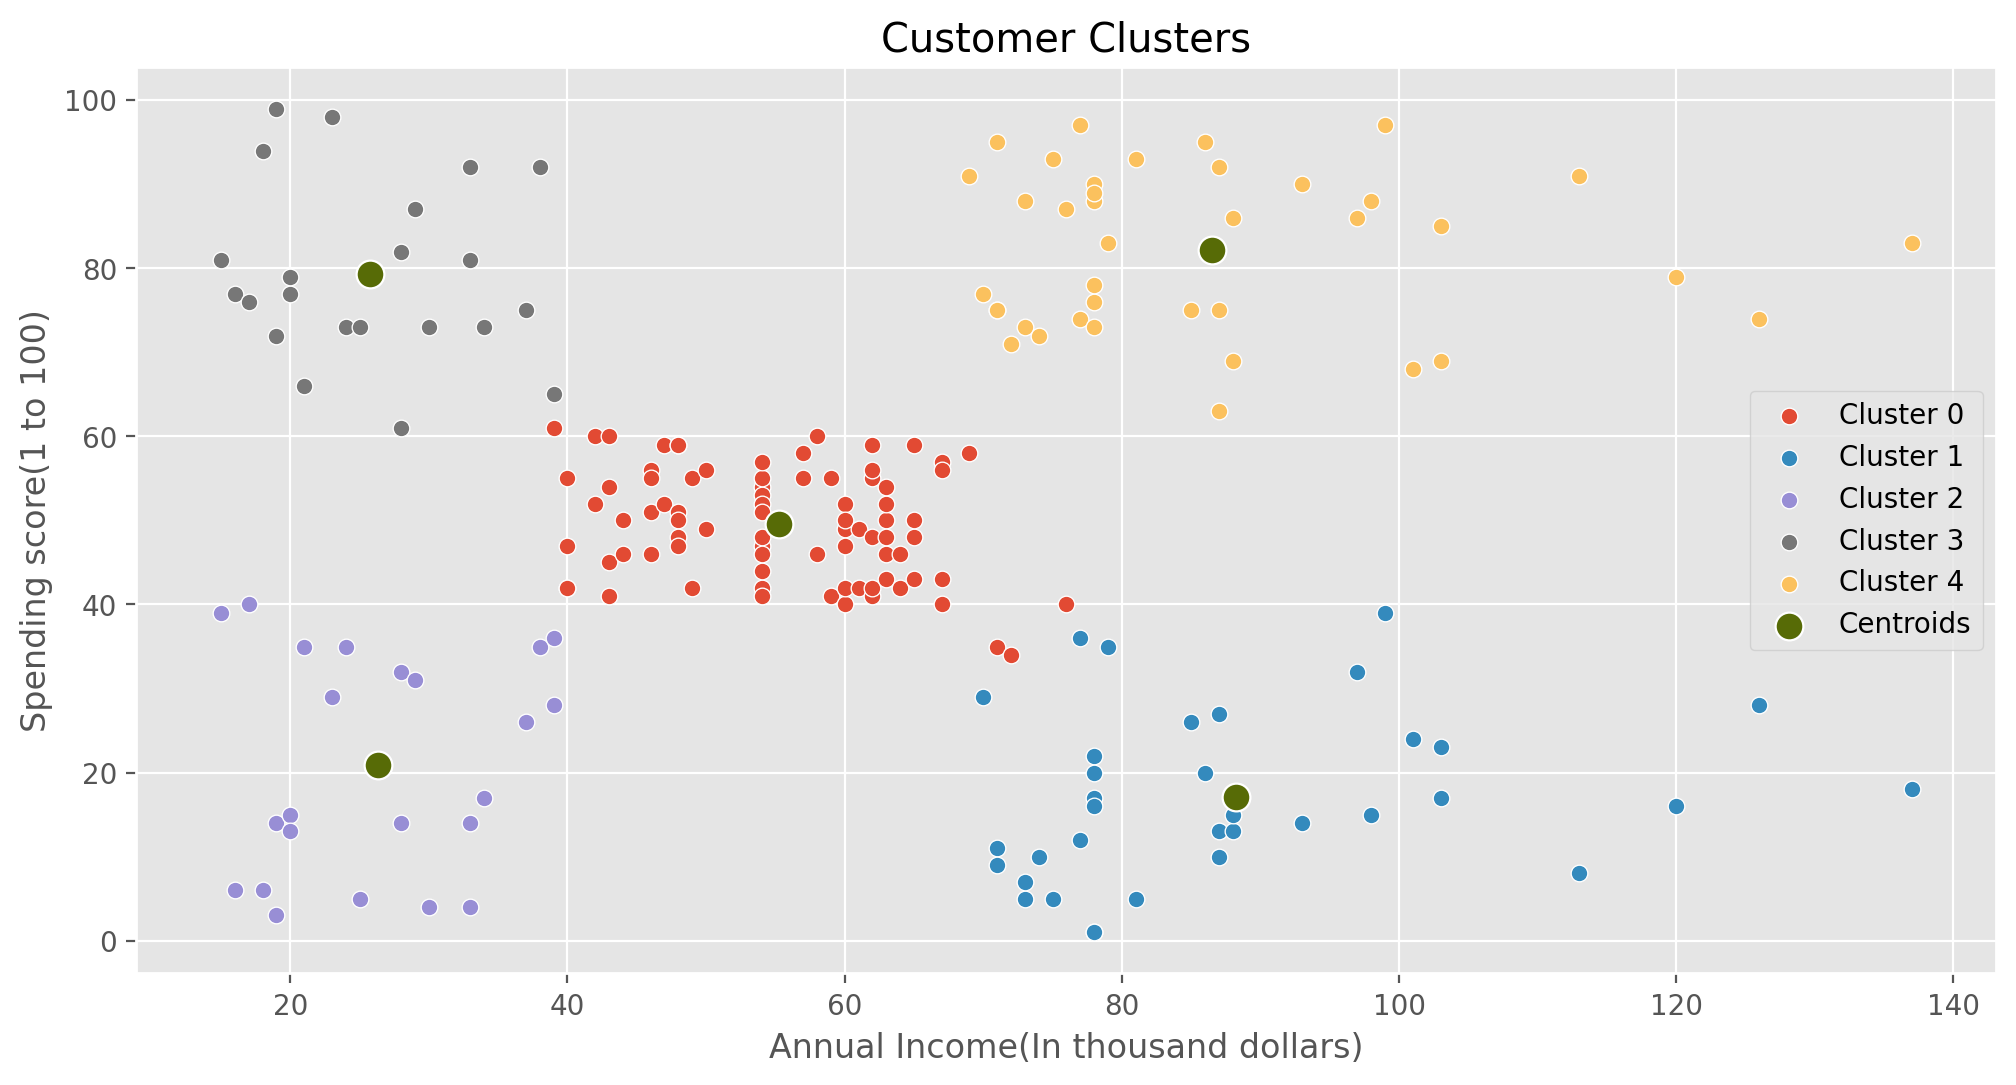

In [72]:
# Visualizing the clusters
plt.figure(figsize = (12,6), dpi = 200)
sns.scatterplot(X[y_kmeans == 0,0], X[y_kmeans == 0,1], label = 'Cluster 0')
sns.scatterplot(X[y_kmeans == 1,0], X[y_kmeans == 1,1], label = 'Cluster 1')
sns.scatterplot(X[y_kmeans == 2,0], X[y_kmeans == 2,1], label = 'Cluster 2')
sns.scatterplot(X[y_kmeans == 3,0], X[y_kmeans == 3,1], label = 'Cluster 3')
sns.scatterplot(X[y_kmeans == 4,0], X[y_kmeans == 4,1], label = 'Cluster 4')

sns.scatterplot(centroids[:,0], centroids[:,1], label = 'Centroids', s = 100, color = '#576b06')

plt.title('Customer Clusters')
plt.xlabel('Annual Income(In thousand dollars)')
plt.ylabel('Spending score(1 to 100)')
plt.legend()
plt.show()